In [16]:
# Import necessary utilities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Import Dow Jones Industrial Average Dataset beginning on January 1st, 2020 found here:
# https://finance.yahoo.com/quote/%5EDJI/history?period1=1577836800&period2=1584403200&interval=1d&filter=history&frequency=1d

DJI_DATASET = r"C:\Users\William\Downloads\^DJI.csv"
disp_data = pd.read_csv(DJI_DATASET)
disp_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000
1,2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000
2,2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000
3,2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000
4,2020-01-08,28556.140625,28866.179688,28522.509766,28745.089844,28745.089844,291750000
5,2020-01-09,28851.970703,28988.009766,28844.310547,28956.900391,28956.900391,275060000
6,2020-01-10,28977.519531,29009.070313,28789.099609,28823.769531,28823.769531,237830000
7,2020-01-13,28869.009766,28909.910156,28819.429688,28907.050781,28907.050781,249830000
8,2020-01-14,28895.500000,29054.160156,28872.269531,28939.669922,28939.669922,287440000
9,2020-01-15,28901.800781,29127.589844,28897.349609,29030.220703,29030.220703,260270000


In [18]:
# Calculate Average Change between opening and closing price per day

disp_data["Average"] = (disp_data["Open"] + disp_data["Close"]) / 2


# Convert dates to datetime format that matches COVID-19 data

disp_data["Date"] = pd.to_datetime(disp_data["Date"], errors = 'ignore', yearfirst = True)

# Drop Unnecessary columns
dji_date_data = disp_data.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Adj Close"])

# Isolate to only January 22nd (only contains weekdays)
dji_date_data = dji_date_data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12])
dji_date_data = dji_date_data.reset_index()
dji_date_data = dji_date_data.drop(columns = ["index"])

# Check results
dji_date_data

,Date,Average
0,2020-01-22,29224.950195
1,2020-01-23,29135.554688
2,2020-01-24,29110.060547
3,2020-01-27,28539.145507
4,2020-01-28,28658.564453
5,2020-01-29,28777.489258
6,2020-01-30,28749.799804
7,2020-01-31,28534.534180
8,2020-02-03,28359.730469
9,2020-02-04,28752.185546


In [19]:
# Import Italy Dow Jones Titans 30 Index found here: 
# https://us.spindices.com/indices/equity/dow-jones-italy-titans-30-index-usd

ITALY_DATASET = r"C:\Users\William\Downloads\italytitansindex.csv"
italy_data = pd.read_csv(ITALY_DATASET)
italy_data = italy_data[italy_data.columns[0:3]].dropna()
italy_data = italy_data.drop(columns = ["Dow Jones Italy Titans 30 Total Return Index (USD)"])
italy_data = italy_data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,33,54]).reset_index().drop(columns = ["index"])
italy_data = italy_data.rename(columns = {"Effective date " : "Date"})
italy_data["Date"] = pd.to_datetime(italy_data["Date"], errors = 'ignore', yearfirst = True)
italy_data

,Date,Dow Jones Italy Titans 30 Index (USD)
0,2020-01-22,1725.65
1,2020-01-23,1719.94
2,2020-01-24,1734.47
3,2020-01-27,1691.01
4,2020-01-28,1732.68
5,2020-01-29,1741.31
6,2020-01-30,1716.91
7,2020-01-31,1685.17
8,2020-02-03,1696.37
9,2020-02-04,1723.13


In [20]:
# Import COVID-19 dataset found here: https://github.com/CSSEGISandData/COVID-19/blob/
# master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

COVID_DATASET = r"C:\Users\William\Downloads\time_series_19-covid-Confirmed.csv"
cov_data = pd.read_csv(COVID_DATASET)
cov_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,21,27,32,32,39,46,64,64,73,103
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,28,38,48,55,65,65,92,112,134,171
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,11,11,15,18,21,21,36,49,57,71
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,13,15,15,18,20,20,35,46,61,68
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,2,2,2,3,3,5,7,7,7


In [21]:
countries = cov_data.sort_values('Country/Region')
countries = countries.reset_index()
countries = countries.drop(columns = ["Lat", "Long", "Province/State", "index"])
countries["Current Total"] = countries.drop(columns = ["Country/Region"]).sum(axis=1)
countries = countries[["Current Total", "Country/Region"]].sort_values("Country/Region")
countries

,Current Total,Country/Region
0,95,Afghanistan
1,211,Albania
2,340,Algeria
3,16,Andorra
4,4,Antigua and Barbuda
5,258,Argentina
6,119,Armenia
7,8,Aruba
15,519,Australia
14,5,Australia


In [22]:
# Select data for US region and drop unwanted variables
cov_US = cov_data.loc[cov_data['Country/Region'] == "US"]
cov_US = cov_US.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_US = cov_US.sum(axis = 0, skipna = True)
sum_US = pd.DataFrame(sum_US)
sum_US = sum_US.reset_index()
sum_US = sum_US.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})

# Change to datetime format to match ^DJI dataset
sum_US["Date"] = pd.to_datetime(sum_US["Date"], errors = 'ignore', infer_datetime_format = True)

# Isolate to only weekdays because not included in ^DJI dataset
sum_US_final = sum_US.drop([3,4,10,11,17,18,24,25,26,31,32,38,39,45,46,52,53])
sum_US_final = sum_US_final.reset_index()
sum_US_final = sum_US_final.drop(columns = {"index"})
# Check results
sum_US_final

,Date,National Confirmed Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-27,5
4,2020-01-28,5
5,2020-01-29,5
6,2020-01-30,5
7,2020-01-31,7
8,2020-02-03,11
9,2020-02-04,11


In [23]:
cov_IT = cov_data.loc[cov_data['Country/Region'] == "Italy"]
cov_IT = cov_IT.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_IT = cov_IT.sum(axis = 0, skipna = True)
sum_IT = pd.DataFrame(sum_IT)
sum_IT = sum_IT.reset_index()
sum_IT = sum_IT.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})

# Change to datetime format to match ^DJI dataset
sum_IT["Date"] = pd.to_datetime(sum_IT["Date"], errors = 'ignore', infer_datetime_format = True)

# Isolate to only weekdays because not included in ^DJI dataset
sum_IT_final = sum_IT.drop([3,4,10,11,17,18,24,25,26,31,32,38,39,45,46,52,53])
sum_IT_final = sum_IT_final.reset_index()
sum_IT_final = sum_IT_final.drop(columns = {"index"})
# Check results
sum_IT_final

,Date,National Confirmed Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-27,0
4,2020-01-28,0
5,2020-01-29,0
6,2020-01-30,0
7,2020-01-31,2
8,2020-02-03,2
9,2020-02-04,2


In [24]:
# Merge data between datasets
result_US = sum_US_final.merge(dji_date_data, left_index=True, right_index=True)
result_IT = sum_IT_final.merge(italy_data, left_index=True, right_index=True)
# Change columns names and drop unwanted columns
result_US = result_US.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date", "Average" : "^DJI Average"})
result_IT = result_IT.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date"})
# Display results
result_US
result_IT

,Date,National Confirmed Cases,Dow Jones Italy Titans 30 Index (USD)
0,2020-01-22,0,1725.65
1,2020-01-23,0,1719.94
2,2020-01-24,0,1734.47
3,2020-01-27,0,1691.01
4,2020-01-28,0,1732.68
5,2020-01-29,0,1741.31
6,2020-01-30,0,1716.91
7,2020-01-31,2,1685.17
8,2020-02-03,2,1696.37
9,2020-02-04,2,1723.13


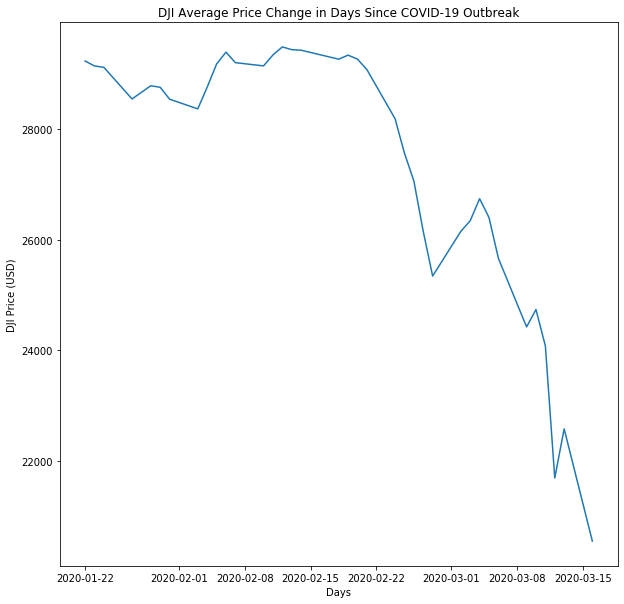

In [25]:
# Visualize results for ^DJI dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_US["Date"], result_US["^DJI Average"])
plt.xlabel("Days")
plt.ylabel("DJI Price (USD)")
plt.title("DJI Average Price Change in Days Since COVID-19 Outbreak")
plt.show()

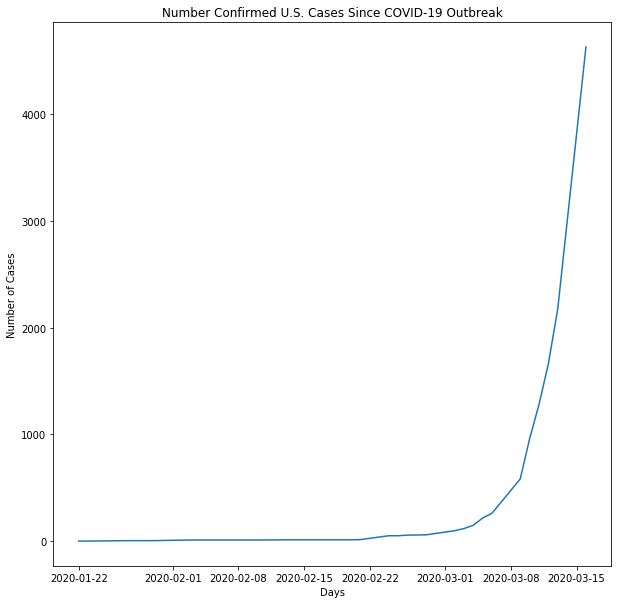

In [26]:
# Visualize results for COVID-19 dataframe

fig = plt.figure(figsize=(10,10))
plt.plot(result_US["Date"], result_US["National Confirmed Cases"])
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number Confirmed U.S. Cases Since COVID-19 Outbreak")
plt.show()

Text(0.5, 1, 'Effect of the COVID-19 Outbreak on the Dow Jones Industrial Average')

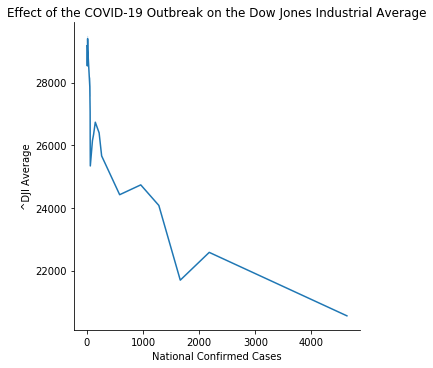

In [27]:
# Visualize relationship between ^DJI and COVID-19 datasets
plot1 = sns.relplot(x="National Confirmed Cases", y="^DJI Average", kind="line", data=result_US)
axes = plot1.axes.flatten()
axes[0].set_title("Effect of the COVID-19 Outbreak on the Dow Jones Industrial Average")

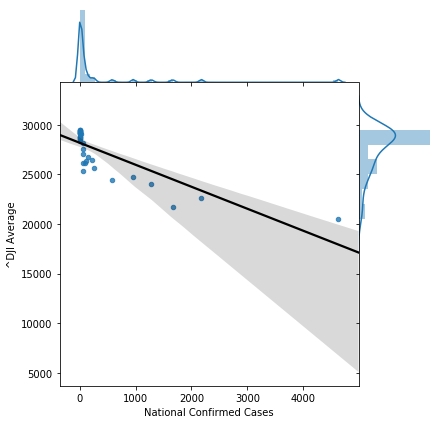

In [28]:
sns.jointplot(
    x='National Confirmed Cases', 
    y='^DJI Average', 
    data=result_US,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

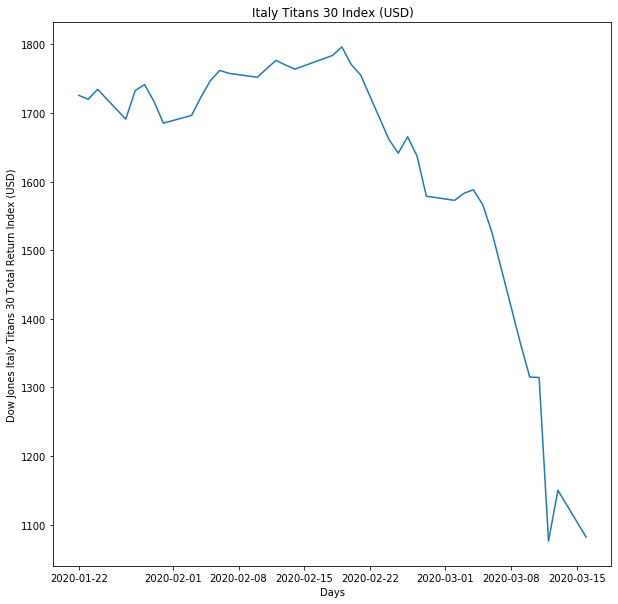

In [29]:
# Visualize results for italy titans 30 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(italy_data["Date"], italy_data["Dow Jones Italy Titans 30 Index (USD)"])
plt.xlabel("Days")
plt.ylabel("Dow Jones Italy Titans 30 Total Return Index (USD)")
plt.title("Italy Titans 30 Index (USD)")
plt.show()

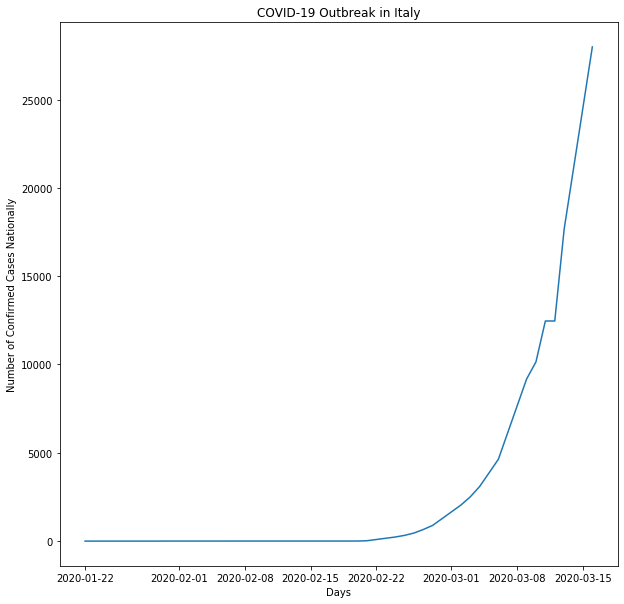

In [30]:
# Visualize results for italy COVID-19 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_IT["Date"], result_IT["National Confirmed Cases"])
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases Nationally")
plt.title("COVID-19 Outbreak in Italy")
plt.show()

Text(0.5, 1, 'Effect of the COVID-19 Outbreak on the Italy Titans 30 Dow Jones Industrial Average')

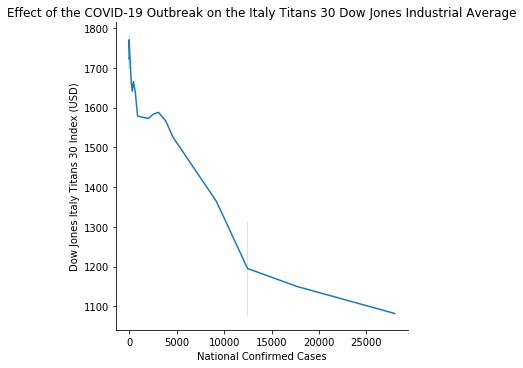

In [31]:
plot1 = sns.relplot(x="National Confirmed Cases", y="Dow Jones Italy Titans 30 Index (USD)", kind="line", data=result_IT)
axes = plot1.axes.flatten()
axes[0].set_title("Effect of the COVID-19 Outbreak on the Italy Titans 30 Dow Jones Industrial Average")

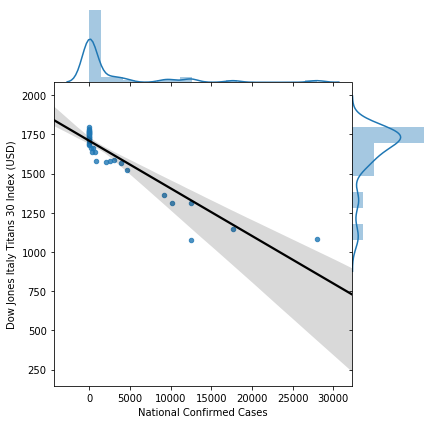

In [32]:
sns.jointplot(
    x='National Confirmed Cases', 
    y='Dow Jones Italy Titans 30 Index (USD)', 
    data=result_IT,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

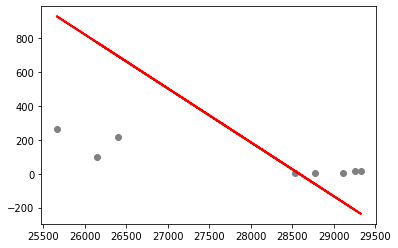

,Actual,Predicted
0,13,-214.105786
1,262,928.119029
2,217,694.536141
3,13,-237.047646
4,2,-167.092694
5,98,773.820653
6,7,15.659195
7,5,-61.488442


In [35]:
# Next we move to the predictive modeling portion of this project. First let's import our libraries
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will begin by first using a linear regression model (it is obvious that the models do not have strictly linear correlations so we are not doing this for accuracy just out of curiosity)
y_US=result_US["National Confirmed Cases"].values.reshape(-1,1)
x_US=result_US["^DJI Average"].values.reshape(-1,1)
x_train_US,x_test_US,y_train_US,y_test_US=train_test_split(x_US,y_US,test_size=0.2)

regressor = LinearRegression()  
regressor.fit(x_train_US, y_train_US)

y_pred_US = regressor.predict(x_test_US)
plt.scatter(x_test_US, y_test_US,  color='gray')
plt.plot(x_test_US, y_pred_US, color='red', linewidth=2)
plt.show()

df = pd.DataFrame({'Actual': y_test_US.flatten(), 'Predicted': y_pred_US.flatten()})
df